In [2]:
import numpy as np
import pandas as pd

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

C:\Users\amrunandu\Anaconda2\main\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [4]:
enron_data = pd.DataFrame.from_dict(data_dict, orient = 'index')

Data Exploration

In [5]:
enron_data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [6]:
print "There are a total of {} people in the dataset." .format(len(enron_data.index)) 
print "Out of which {} are POI and {} Non-POI." .format(enron_data['poi'].value_counts()[True], 
                                                 enron_data['poi'].value_counts()[False])
print "Total number of email plus financial features are {}. 'poi' column is our label." \
.format(len(enron_data.columns)-1)

There are a total of 146 people in the dataset.
Out of which 18 are POI and 128 Non-POI.
Total number of email plus financial features are 20. 'poi' column is our label.


Enron dataset is really messy and has a lot of missing values (NaN). All the features have missing values. Some features have more than 50% of their values missing, as we can see from the frequency of NaN from the table below. NaNs are coerced to 0 for training our algorithm later.

In [7]:
enron_data.describe().transpose()

,count,unique,top,freq
salary,146,95,NaN,51
to_messages,146,87,NaN,60
deferral_payments,146,40,NaN,107
total_payments,146,126,NaN,21
exercised_stock_options,146,102,NaN,44
bonus,146,42,NaN,64
restricted_stock,146,98,NaN,36
shared_receipt_with_poi,146,84,NaN,60
restricted_stock_deferred,146,19,NaN,128
total_stock_value,146,125,NaN,20


In [11]:
enron_data.replace(to_replace='NaN', value=0.0, inplace=True)


In [16]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi']
for key in data_dict.keys():
    for value in data_dict[key]:
        if value in features_list:
            continue
        features_list.append(value)
    break

import pprint
pprint.pprint(features_list)

['poi',
 'salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']


In [17]:
features_list.remove('email_address')
pprint.pprint(features_list)

['poi',
 'salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person']


In [18]:
for feature in features_list:
    cnt=0
    for key in data_dict.keys():
        if data_dict[key][feature] == 'NaN':
            cnt+=1
    print feature + " -> " + str(cnt)

poi -> 0
salary -> 51
to_messages -> 60
deferral_payments -> 107
total_payments -> 21
exercised_stock_options -> 44
bonus -> 64
restricted_stock -> 36
shared_receipt_with_poi -> 60
restricted_stock_deferred -> 128
total_stock_value -> 20
expenses -> 51
loan_advances -> 142
from_messages -> 60
other -> 53
from_this_person_to_poi -> 60
director_fees -> 129
deferred_income -> 97
long_term_incentive -> 80
from_poi_to_this_person -> 60


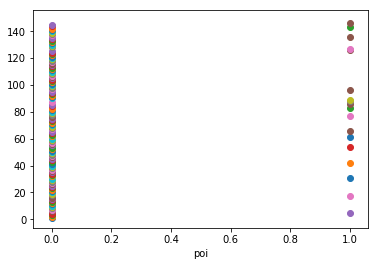

HANNON KEVIN P
True

 ------------------------------------------------------------------------------------ 



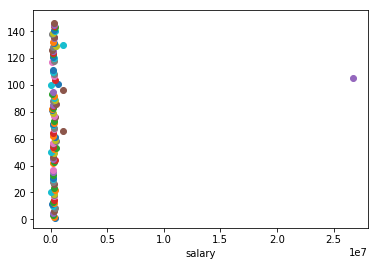

TOTAL
26704229

 ------------------------------------------------------------------------------------ 



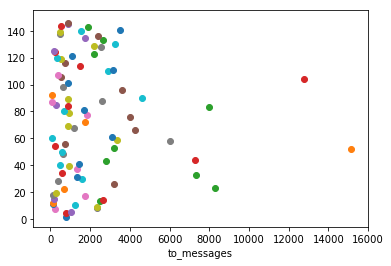

SHAPIRO RICHARD S
15149

 ------------------------------------------------------------------------------------ 



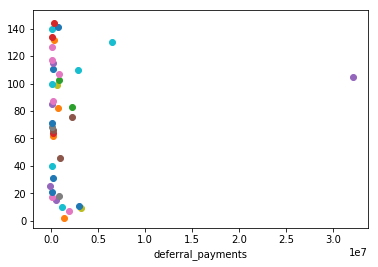

TOTAL
32083396

 ------------------------------------------------------------------------------------ 



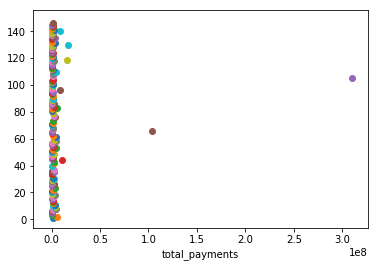

TOTAL
309886585

 ------------------------------------------------------------------------------------ 



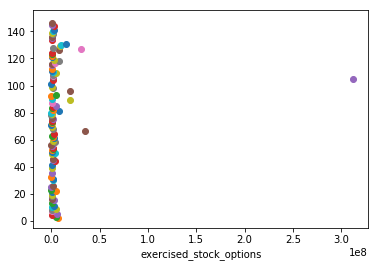

TOTAL
311764000

 ------------------------------------------------------------------------------------ 



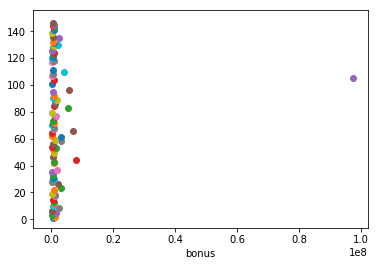

TOTAL
97343619

 ------------------------------------------------------------------------------------ 



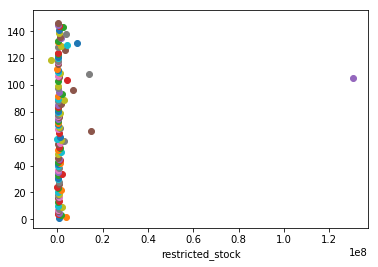

TOTAL
130322299

 ------------------------------------------------------------------------------------ 



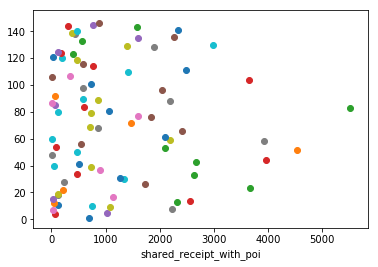

BELDEN TIMOTHY N
5521

 ------------------------------------------------------------------------------------ 



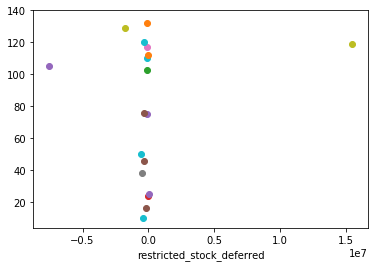

BHATNAGAR SANJAY
15456290

 ------------------------------------------------------------------------------------ 



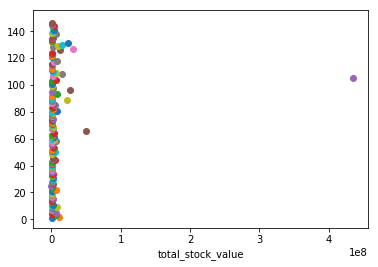

TOTAL
434509511

 ------------------------------------------------------------------------------------ 



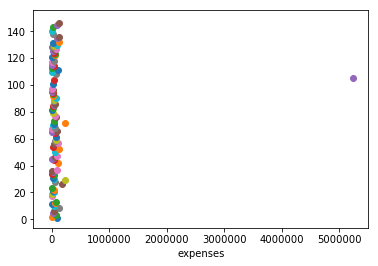

TOTAL
5235198

 ------------------------------------------------------------------------------------ 



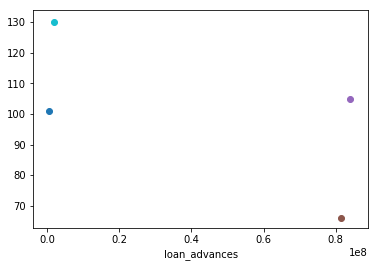

TOTAL
83925000

 ------------------------------------------------------------------------------------ 



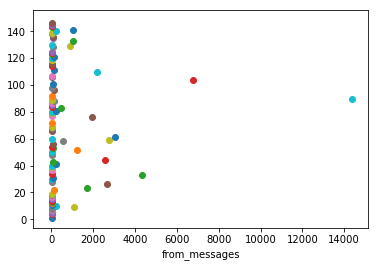

KAMINSKI WINCENTY J
14368

 ------------------------------------------------------------------------------------ 



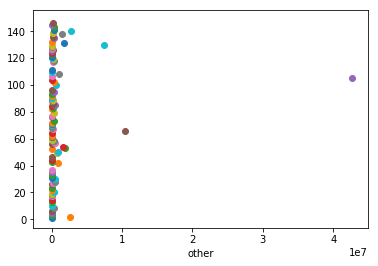

TOTAL
42667589

 ------------------------------------------------------------------------------------ 



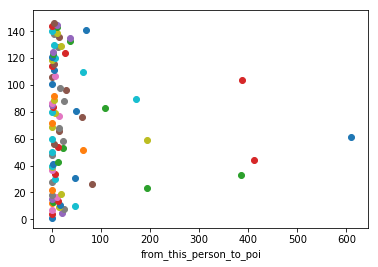

DELAINEY DAVID W
609

 ------------------------------------------------------------------------------------ 



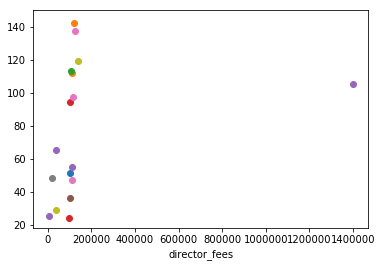

TOTAL
1398517

 ------------------------------------------------------------------------------------ 



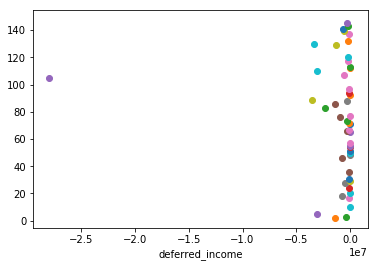

TOTAL
0

 ------------------------------------------------------------------------------------ 



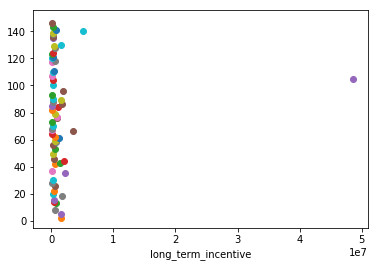

TOTAL
48521928

 ------------------------------------------------------------------------------------ 



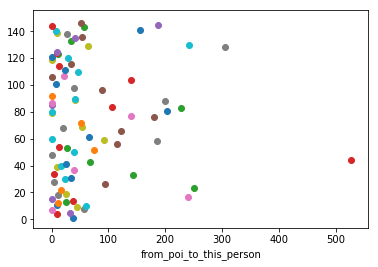

LAVORATO JOHN J
528

 ------------------------------------------------------------------------------------ 



In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

for feature in features_list:
    maxi = 0
    cnt=0
    for key in data_dict:
        cnt+=1
        point=data_dict[key][feature]
        if point>maxi and point != 'NaN':
            maxi = point
            name = key
        plt.scatter(point, cnt)
    plt.xlabel(feature)
    plt.show()
    print name
    print maxi
    print "\n ------------------------------------------------------------------------------------ \n"


In [20]:
### Task 2: Remove outliners
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

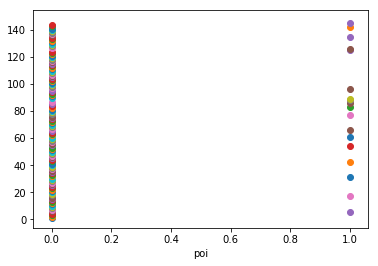

HANNON KEVIN P
True

 ------------------------------------------------------------------------------------ 



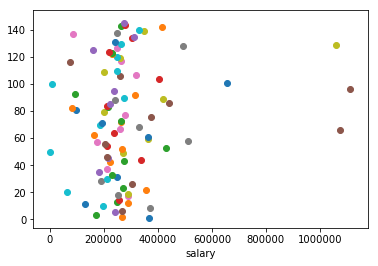

SKILLING JEFFREY K
1111258

 ------------------------------------------------------------------------------------ 



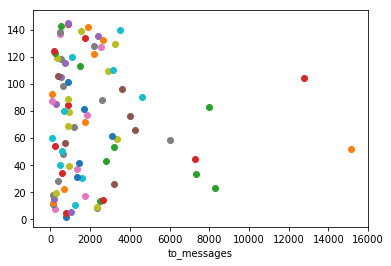

SHAPIRO RICHARD S
15149

 ------------------------------------------------------------------------------------ 



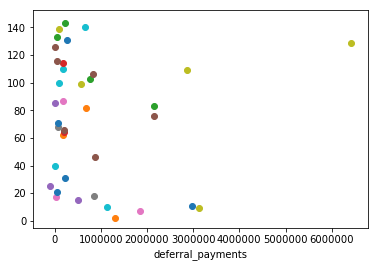

FREVERT MARK A
6426990

 ------------------------------------------------------------------------------------ 



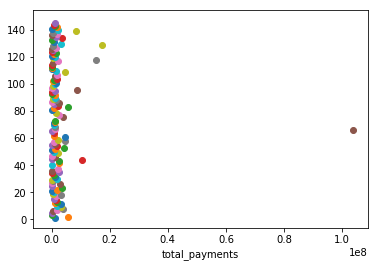

LAY KENNETH L
103559793

 ------------------------------------------------------------------------------------ 



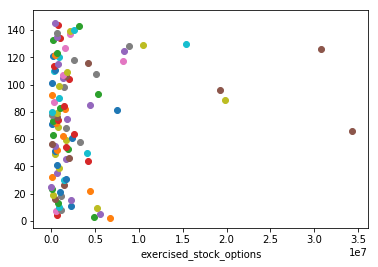

LAY KENNETH L
34348384

 ------------------------------------------------------------------------------------ 



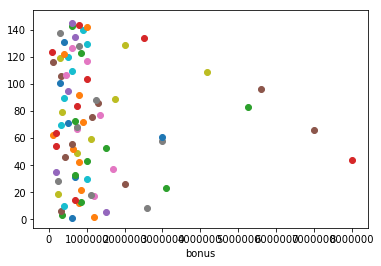

LAVORATO JOHN J
8000000

 ------------------------------------------------------------------------------------ 



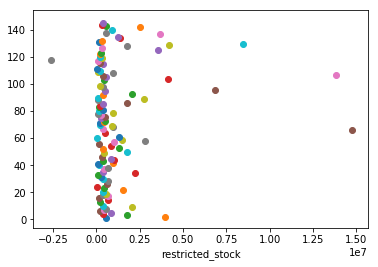

LAY KENNETH L
14761694

 ------------------------------------------------------------------------------------ 



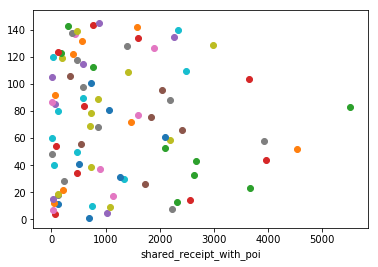

BELDEN TIMOTHY N
5521

 ------------------------------------------------------------------------------------ 



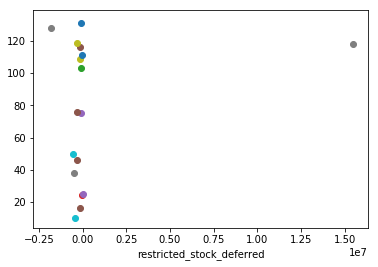

BHATNAGAR SANJAY
15456290

 ------------------------------------------------------------------------------------ 



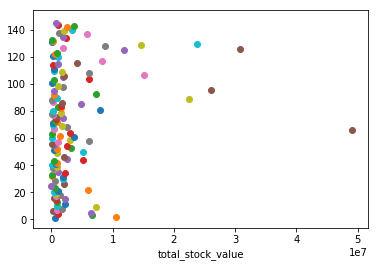

LAY KENNETH L
49110078

 ------------------------------------------------------------------------------------ 



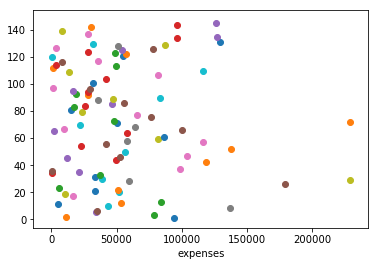

MCCLELLAN GEORGE
228763

 ------------------------------------------------------------------------------------ 



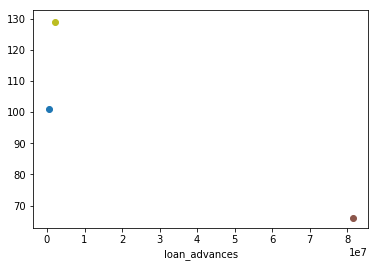

LAY KENNETH L
81525000

 ------------------------------------------------------------------------------------ 



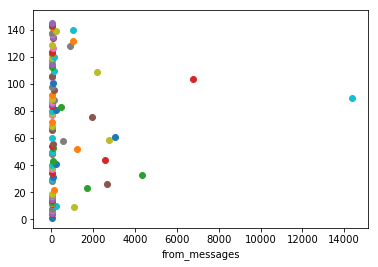

KAMINSKI WINCENTY J
14368

 ------------------------------------------------------------------------------------ 



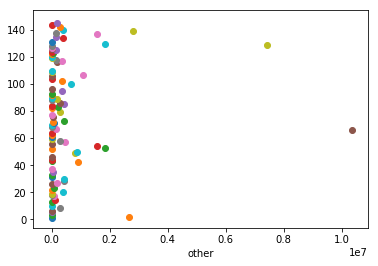

LAY KENNETH L
10359729

 ------------------------------------------------------------------------------------ 



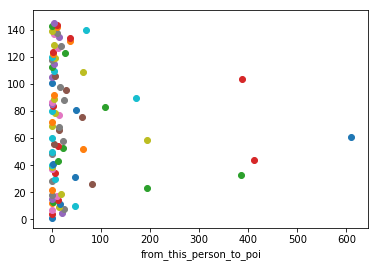

DELAINEY DAVID W
609

 ------------------------------------------------------------------------------------ 



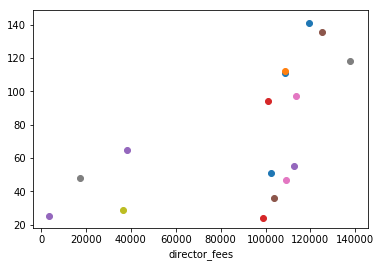

BHATNAGAR SANJAY
137864

 ------------------------------------------------------------------------------------ 



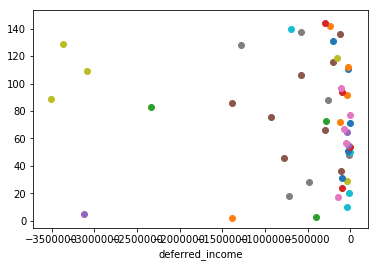

BHATNAGAR SANJAY
0

 ------------------------------------------------------------------------------------ 



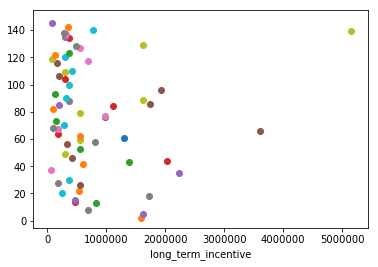

MARTIN AMANDA K
5145434

 ------------------------------------------------------------------------------------ 



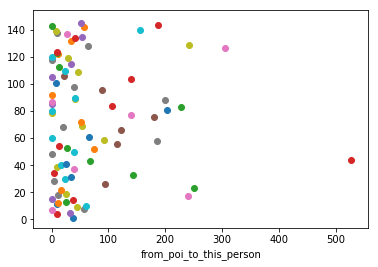

LAVORATO JOHN J
528

 ------------------------------------------------------------------------------------ 



In [21]:
for feature in features_list:
    maxi = 0
    cnt=0
    for key in data_dict:
        cnt+=1
        point=data_dict[key][feature]
        if point>maxi and point != 'NaN':
            maxi = point
            name = key
        plt.scatter(point, cnt)
    plt.xlabel(feature)
    plt.show()
    print name
    print maxi
    print "\n ------------------------------------------------------------------------------------ \n"


In [22]:
for key in data_dict.keys():
    print key

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HORTON STANLEY C
PIPER GREGORY F
HUMPHREY GENE E
UMANOFF ADAM S
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
MCCARTY DANNY J
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUC

In [23]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [24]:
features_list.remove('restricted_stock_deferred')
features_list.remove('director_fees')
features_list.remove('loan_advances')

In [25]:
for key in data_dict.keys():
    try:
        data_dict[key]['fraction_from_this_person_to_poi'] = float(data_dict[key]['from_this_person_to_poi']
                                                              )/data_dict[key]['from_messages']
    except:
        data_dict[key]['fraction_from_this_person_to_poi'] = 'NaN'
        
    try:
        data_dict[key]['fraction_from_poi_to_this_person'] = float(data_dict[key]['from_poi_to_this_person']
                                                              )/data_dict[key]['to_messages']
    except:
        data_dict[key]['fraction_from_poi_to_this_person'] = 'NaN'

In [26]:
features_list.append('fraction_from_this_person_to_poi')
features_list.append('fraction_from_poi_to_this_person')
features_list.remove('from_this_person_to_poi')
features_list.remove('from_poi_to_this_person')
features_list.remove('from_messages')
features_list.remove('to_messages')

In [27]:
pprint.pprint(features_list)

['poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'total_stock_value',
 'expenses',
 'other',
 'deferred_income',
 'long_term_incentive',
 'fraction_from_this_person_to_poi',
 'fraction_from_poi_to_this_person']


In [28]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [34]:
### Task 3: Create new feature(s)

# Bonus-salary ratio
for employee, features in data_dict.iteritems():
    if features['bonus'] == "NaN" or features['salary'] == "NaN":
        features['bonus_salary_ratio'] = "NaN"
    else:
        features['bonus_salary_ratio'] = float(features['bonus']) / float(features['salary'])

# from_this_person_to_poi as a percentage of from_messages
for employee, features in data_dict.iteritems():
    if features['from_this_person_to_poi'] == "NaN" or features['from_messages'] == "NaN":
        features['from_this_person_to_poi_percentage'] = "NaN"
    else:
        features['from_this_person_to_poi_percentage'] = float(features['from_this_person_to_poi']) / float(features['from_messages'])

# from_poi_to_this_person as a percentage of to_messages
for employee, features in data_dict.iteritems():
    if features['from_poi_to_this_person'] == "NaN" or features['to_messages'] == "NaN":
        features['from_poi_to_this_person_percentage'] = "NaN"
    else:
        features['from_poi_to_this_person_percentage'] = float(features['from_poi_to_this_person']) / float(features['to_messages'])

### Impute missing email features to mean
email_features = ['to_messages',
                   'from_poi_to_this_person',
                   'from_poi_to_this_person_percentage',
                   'from_messages',
                   'from_this_person_to_poi',
                   'from_this_person_to_poi_percentage',
                   'shared_receipt_with_poi']
from collections import defaultdict
email_feature_sums = defaultdict(lambda:0)
email_feature_counts = defaultdict(lambda:0)

for employee, features in data_dict.iteritems():
    for ef in email_features:
        if features[ef] != "NaN":
            email_feature_sums[ef] += features[ef]
            email_feature_counts[ef] += 1

email_feature_means = {}
for ef in email_features:
    email_feature_means[ef] = float(email_feature_sums[ef]) / float(email_feature_counts[ef])

for employee, features in data_dict.iteritems():
    for ef in email_features:
        if features[ef] == "NaN":
            features[ef] = email_feature_means[ef]

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys=True)
labels, features = targetFeatureSplit(data)

In [35]:
### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Potential pipeline steps
scaler = MinMaxScaler()
select = SelectKBest()
dtc = DecisionTreeClassifier()
svc = SVC()
knc = KNeighborsClassifier()

# Load pipeline steps into list
steps = [
         # Preprocessing
         # ('min_max_scaler', scaler),
         
         # Feature selection
         ('feature_selection', select),
         
         # Classifier
         ('dtc', dtc)
         # ('svc', svc)
         # ('knc', knc)
         ]

# Create pipeline
pipeline = Pipeline(steps)

# Parameters to try in grid search
parameters = dict(
                  feature_selection__k=[2, 3, 5, 6], 
                  dtc__criterion=['gini', 'entropy'],
                  # dtc__splitter=['best', 'random'],
                  dtc__max_depth=[None, 1, 2, 3, 4],
                  dtc__min_samples_split=[1, 2, 3, 4, 25],
                  # dtc__min_samples_leaf=[1, 2, 3, 4],
                  # dtc__min_weight_fraction_leaf=[0, 0.25, 0.5],
                  dtc__class_weight=[None, 'balanced'],
                  dtc__random_state=[42]
                  # svc__C=[0.1, 1, 10, 100, 1000],
                  # svc__kernel=['rbf'],
                  # svc__gamma=[0.001, 0.0001]
                  # knc__n_neighbors=[1, 2, 3, 4, 5],
                  # knc__leaf_size=[1, 10, 30, 60],
                  # knc__algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
                  )


In [38]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Create training sets and test sets
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# Cross-validation for parameter tuning in grid search 
sss = StratifiedShuffleSplit(
    labels_train,
    n_iter = 20,
    test_size = 0.5,
    random_state = 0
    )

# Create, fit, and make predictions with grid search
gs = GridSearchCV(pipeline,
                  param_grid=parameters,
                  scoring="f1",
                  cv=sss,
                  error_score=0)
gs.fit(features_train, labels_train)
labels_predictions = gs.predict(features_test)

# Pick the classifier with the best tuned parameters
clf = gs.best_estimator_
print "\n", "Best parameters are: ", gs.best_params_, "\n"

# Print features selected and their importances
features_selected=[features_list[i+1] for i in clf.named_steps['feature_selection'].get_support(indices=True)]
scores = clf.named_steps['feature_selection'].scores_
importances = clf.named_steps['dtc'].feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'The ', len(features_selected), " features selected and their importances:"
for i in range(len(features_selected)):
    print "feature no. {}: {} ({}) ({})".format(i+1,features_selected[indices[i]],importances[indices[i]], scores[indices[i]])

# Print classification report (focus on precision and recall)
report = classification_report( labels_test, labels_predictions )
print(report)
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

TypeError: Singleton array array(<built-in function format>, dtype=object) cannot be considered a valid collection.

In [40]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth =2, min_samples_split=2, min_samples_leaf=6)

dump_classifier_and_data(clf, my_dataset, features_list)